# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Loading the dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.count()

,0
show_id,8807
type,8807
title,8807
director,6173
cast,7982
country,7976
date_added,8797
release_year,8807
rating,8803
duration,8804


# EDA

## Movies vs TV Shows

<ipython-input-5-a04f34d8640e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette = 'pastel')


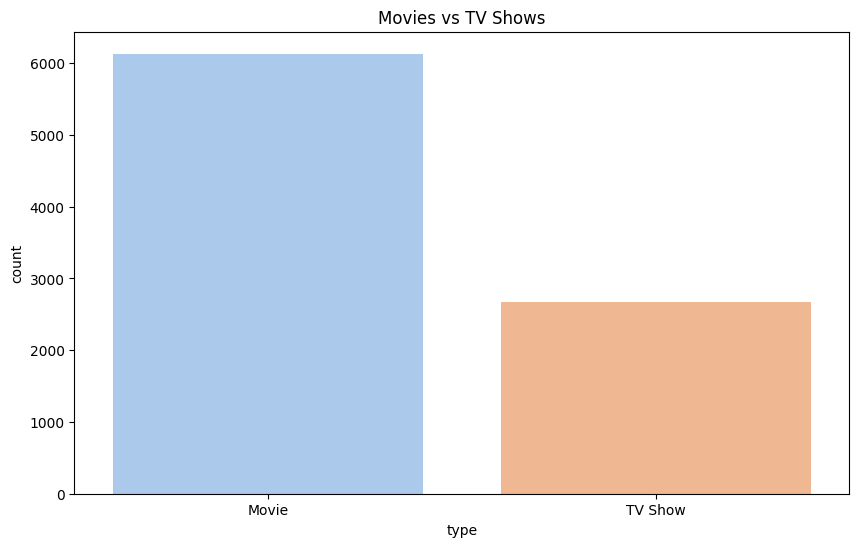

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette = 'pastel')
plt.title('Movies vs TV Shows')
plt.show()

## Releases in the last 25 years

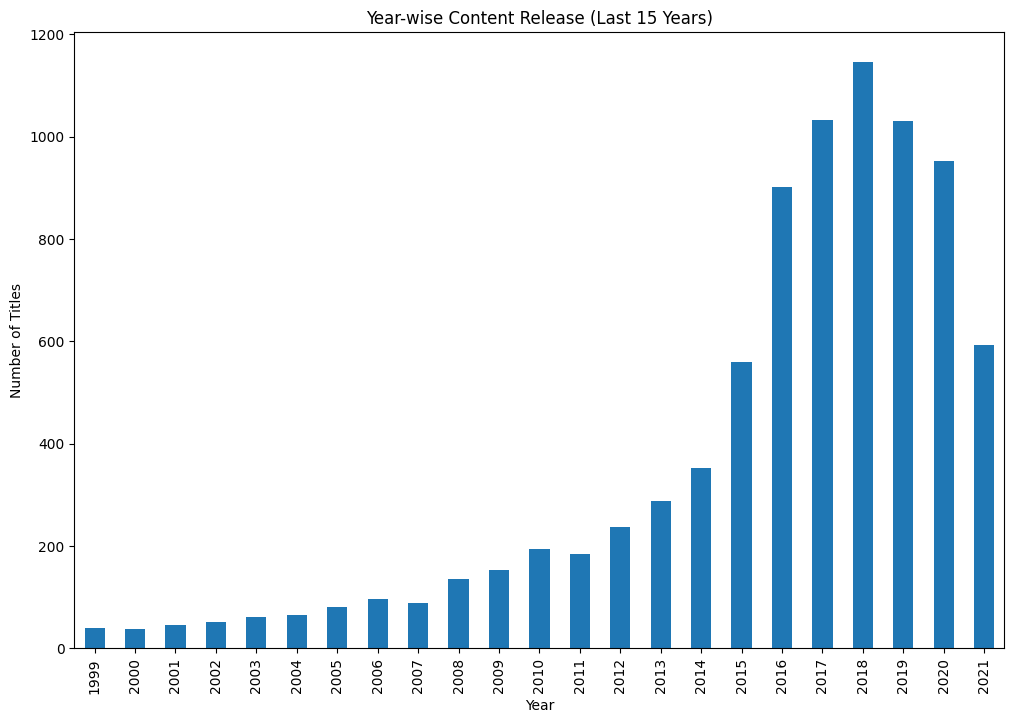

In [6]:
current_year = pd.Timestamp.now().year
last_25_years = df[df['release_year'] >= (current_year - 25)]

plt.figure(figsize=(12, 8))
last_25_years['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Year-wise Content Release (Last 15 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

## Word cloud for genres in Movies


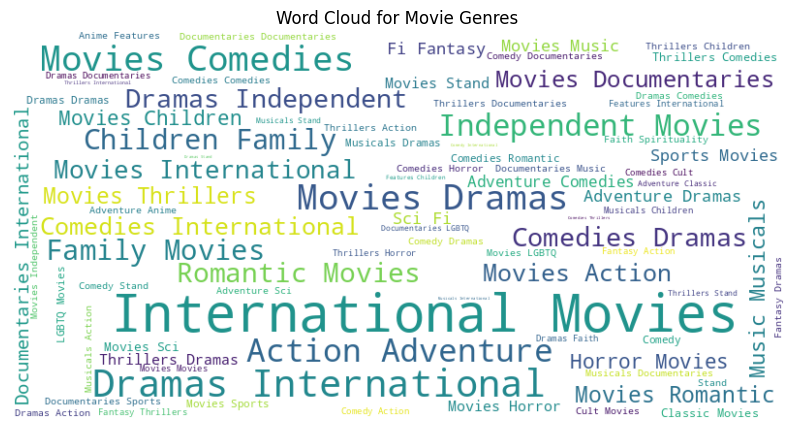

In [7]:
movies_df = df[df['type'] == 'Movie']

# Join the genres for movies
genres = ' '.join(movies_df['listed_in'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Genres')
plt.show()

## Word cloud for genres in TV Shows


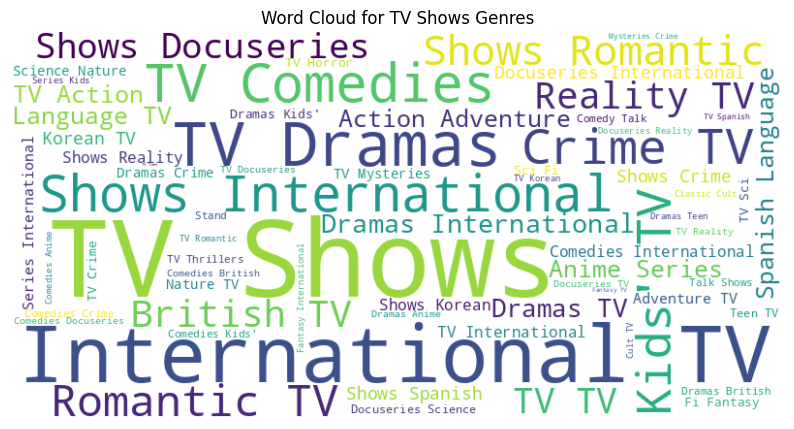

In [8]:
movies_df = df[df['type'] == 'TV Show']

# Join the genres for movies
genres = ' '.join(movies_df['listed_in'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for TV Shows Genres')
plt.show()


## Dates in which more Movies are released

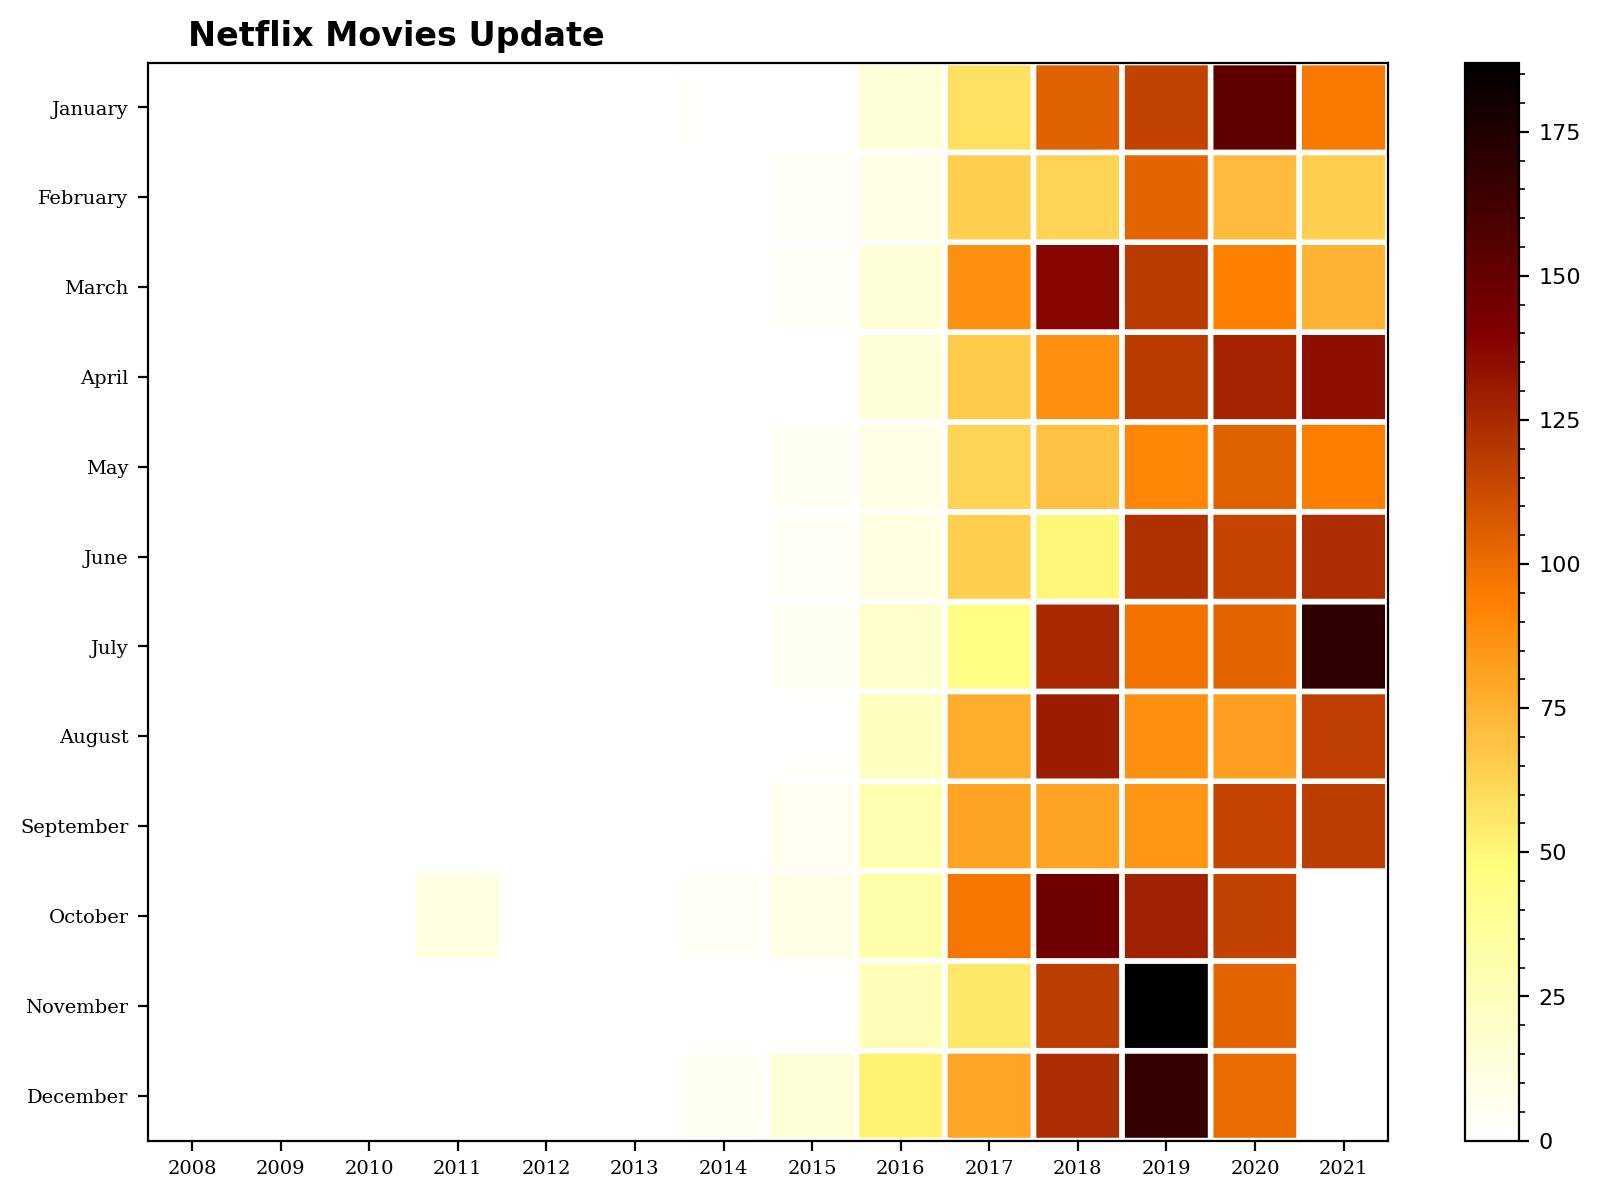

In [9]:
movies=df[df['type']=='Movie']
date = movies[['date_added']].dropna()
date['year'] = date['date_added'].apply(lambda x : x.split(', ')[-1])
date['month'] = date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df1 = date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df1, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Movies Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

## Dates in which more TV shows are released

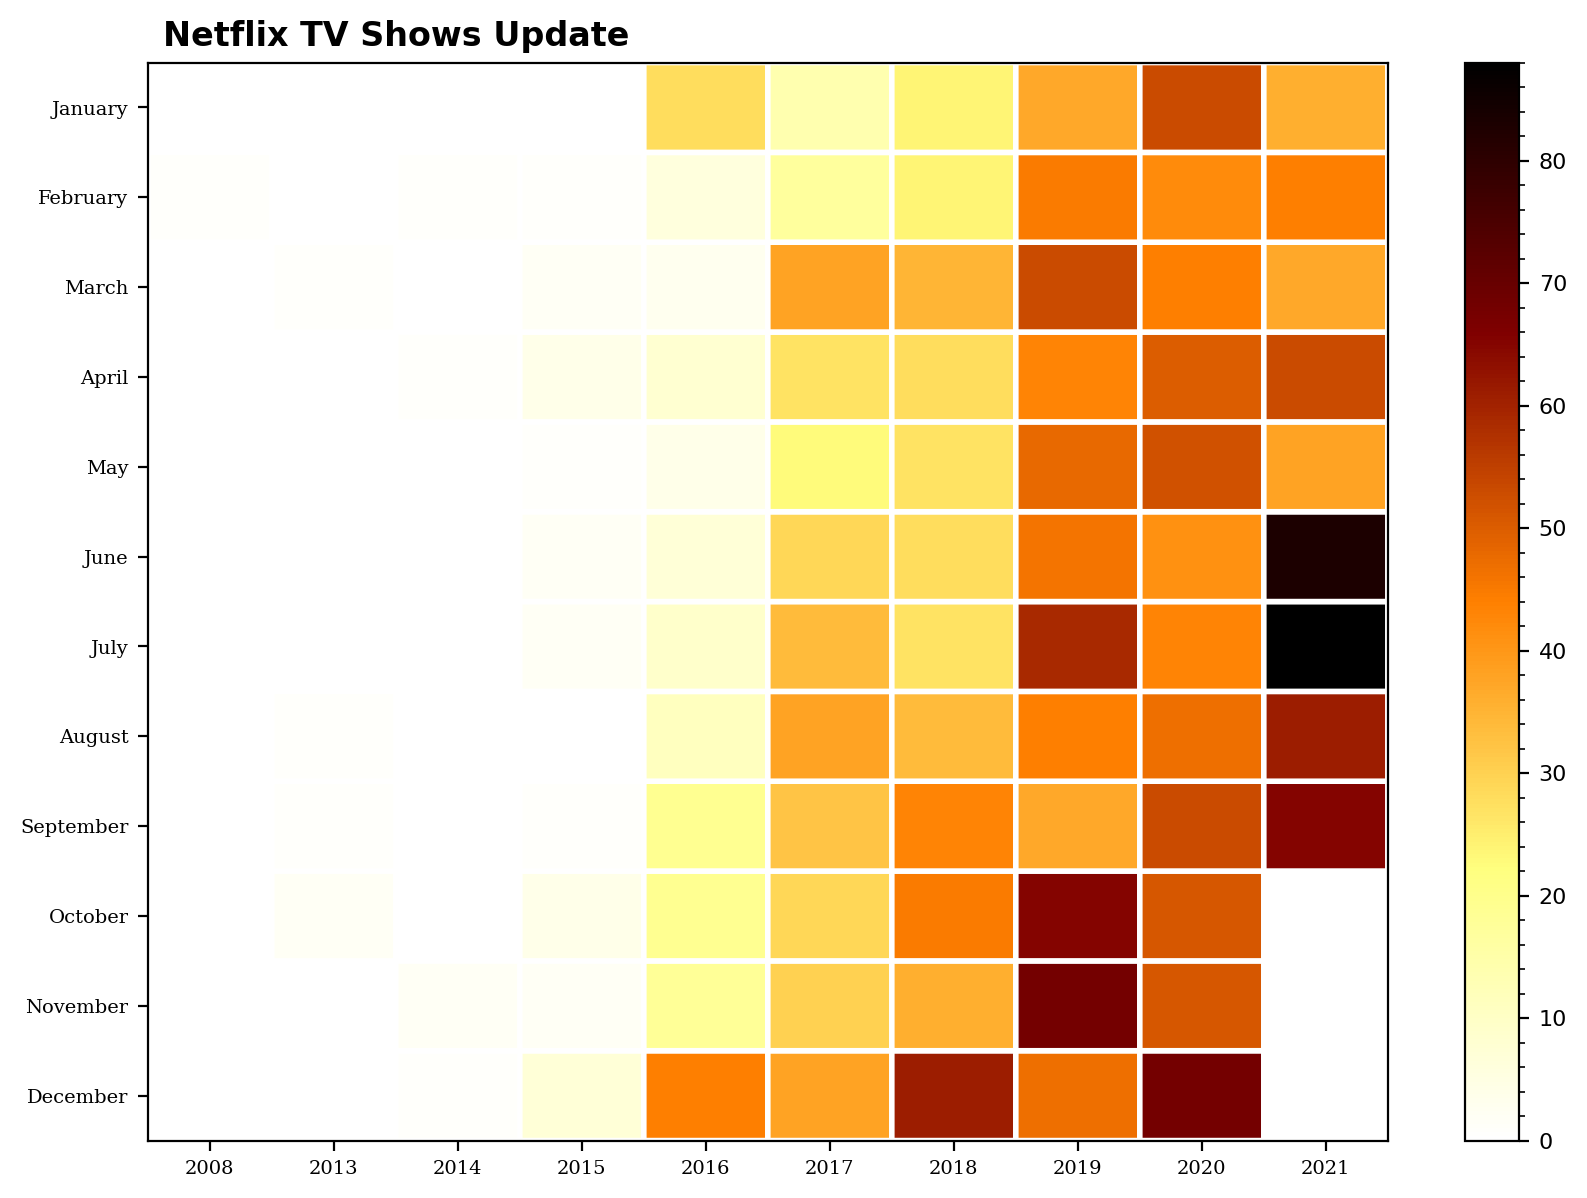

In [10]:
tv_shows=df[df['type']=='TV Show']
date = tv_shows[['date_added']].dropna()
date['year'] = date['date_added'].apply(lambda x : x.split(', ')[-1])
date['month'] = date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df2 = date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df2, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df2.columns), 1), df2.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df2.index), 1), df2.index, fontsize=7, fontfamily='serif')

plt.title('Netflix TV Shows Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

## Ratings

<ipython-input-11-c6081d3cd8dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=df, palette="pastel", order=df['rating'].value_counts().index[0:15])


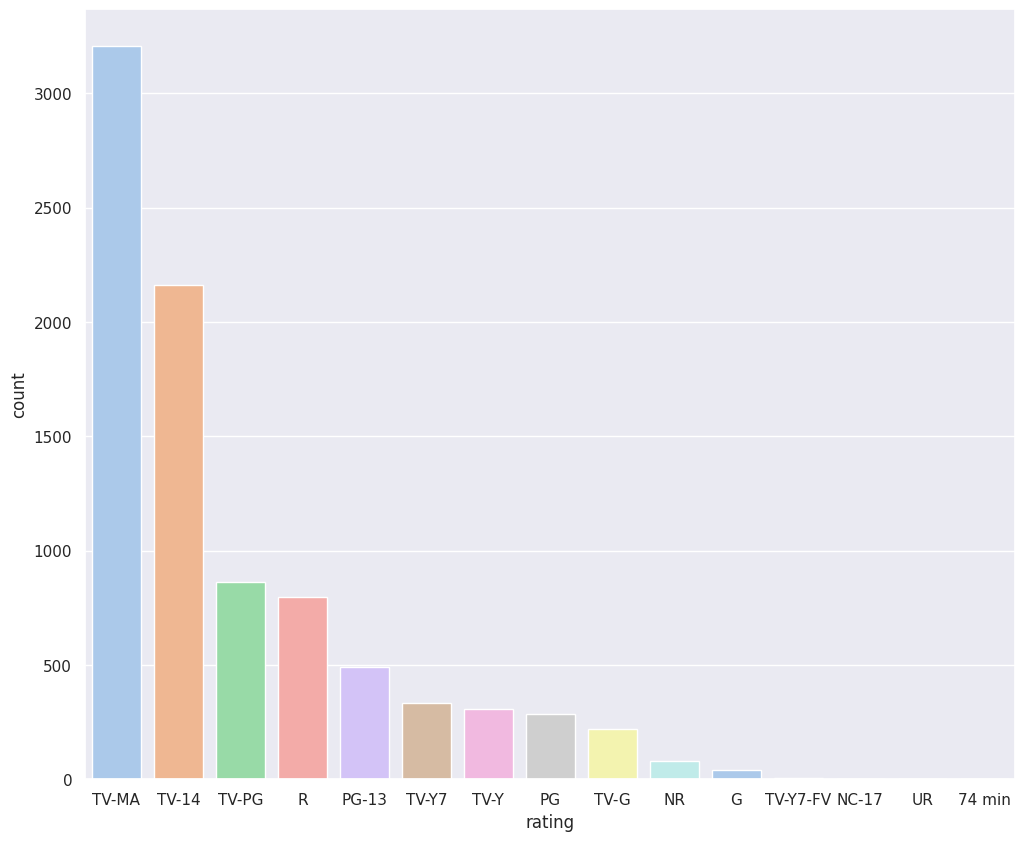

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="pastel", order=df['rating'].value_counts().index[0:15])

# Recommendation models

## TF-IDF

In [12]:
# Fill NaN values in relevant columns with empty strings to avoid errors
df['director'] = df['director'].fillna('')
df['cast'] = df['cast'].fillna('')
df['country'] = df['country'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')
df['description'] = df['description'].fillna('')

# Combine relevant features into a single string
df['combined_features'] = df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['description']

# Use TF-IDF Vectorizer to convert text to a matrix of TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on the title
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['title'].str.lower() == title.lower()].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the titles of the recommended movies
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

# Test the recommendation system
print(get_recommendations('Leila'))

2896                        The Body
6522                         Company
4582    Luv Shuv Tey Chicken Khurana
7898                            Rukh
3913        Hazaaron Khwaishein Aisi
7080           Inside The Freemasons
3914                  Jhankaar Beats
3048                 Half Girlfriend
5251      The Royal House of Windsor
1388                 The White Tiger
Name: title, dtype: object


## SVD


In [16]:
# We create 100 fake users
np.random.seed(42)
user_ids = np.random.randint(1, 101, df.shape[0])


interactions = pd.DataFrame({
    'user_id': user_ids,
    'title': df['title'],
    'rating': np.random.randint(1, 6, df.shape[0])  # Random scores between 1 and 5
})

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(interactions[['user_id', 'title', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()

# Train the model
model.fit(trainset)


predictions = model.test(testset)

# Efficency of the model
rmse = accuracy.rmse(predictions)


def get_svd_recommendations(user_id, n_recommendations=10):

    user_ratings = interactions[interactions['user_id'] == user_id]
    watched_titles = set(user_ratings['title'])

    # Recommendation of movies the users has not seen
    all_titles = set(df['title'])
    titles_to_predict = list(all_titles - watched_titles)

    predictions = []
    for title in titles_to_predict:
        # Predicction of the score that the user may give to each movie
        pred = model.predict(user_id, title)
        predictions.append((title, pred.est))


    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n_recommendations]

    return [rec[0] for rec in recommendations]

# Test the recommendation system
user_id = 8
recommendations = get_svd_recommendations(user_id)
print("Recommendations to user", user_id, ":", recommendations)


RMSE: 1.4312
Recommendations to user 8 : ['Beat Bugs: All Together Now', 'Bangkok Breaking', 'All of You', 'Legend Quest', 'Cliffhanger', 'Tanu Weds Manu', 'Million Yen Women', 'Kalki', 'Janoskians: Untold and Untrue', 'Stories by Rabindranath Tagore']


In [14]:
# RMSE evaluation
rmse = accuracy.rmse(predictions)
print(f"RMSE del modelo: {rmse}")


RMSE: 1.4312
RMSE del modelo: 1.4311894640492968
